# Lab05 Extra

Linear regression for dummies

In [2]:
import numpy as np
import pandas as po

## 1. Introduction/Review: Data Types

### Vectors
There are many definitions of a vector, catered to their own respective fields. For our purposes here in this data-oriented class, a vector is simply a one-dimensional array of numbers. When constructing one, it helps to think of it as "a list."

In [ ]:
# This is a vector. It is essentially a "list" (indicated by the [] notation)
vector = np.array([1,2,3])
print(vector)

[1 2 3]


Python, for the most part, does a fairly good job of interpreting whether a vector should be a *row* vector or a *column* vector. However, keeping track of the dimensions of your vectors and matrices is a good practice.

Notice that we we wrap our list of numbers in an `np.array()`. This is to make it conducive to further calculations. As you'll see, regular ol' lists are terrible for doing arithmetic.

### Matrices
In context of this notebook, a matrix is simply an $n$-dimensional array of numbers, where $ n>1 $. When constructing one, it helps to think of it as "a list of lists".

In [ ]:
# This is a matrix. It is essentially a "list of lists". The list below contains two lists: [1,2,3] and [4,5,6].
matrix = np.array([ [1,2,3], [4,5,6] ])
print(matrix)

[[1 2 3]
 [4 5 6]]


In a matrix, each inner list corresponds to a row. When making matrices, it is often rewritten to make it more user-legible:

In [ ]:
matrix = np.array([
    [1,2,3], # a row vector
    [4,5,6] # a row vector
])
print(matrix)

[[1 2 3]
 [4 5 6]]


Rewritten as such, you can also think of a matrix as a bunch of *row* vectors stacked on top of one another.

## Numpy arrays vs. Lists
While they look quite similar, they possess quite different properties. It's very important to distinguish the two; when you inevitably create your own functions, passing in a list vs. an array can have an immense impact on the accuracy and runtime of your program. This section will highlight a key difference.

In [ ]:
regular_list = [1,2,3]
numpy_array = np.array(regular_list)

### 1. Performing math operations
Let's take a look at what happens when we try to add 1 to our list and array.

In [ ]:
numpy_array_plus_1 = numpy_array + 1
numpy_array_plus_1

array([2, 3, 4])

In [ ]:
regular_list_plus_1 = regular_list + 1
regular_list_plus_1

TypeError: can only concatenate list (not "int") to list

The error you received basically says "you can't add a list and an integer. You can only add a list to another list."

#### Go back and fix the code above for `regular_list_plus_1` to get the same result as `numpy_array_plus_1`.
Hint: You'll need a for-loop.

How about adding two lists vs. adding two arrays?

In [ ]:
regular_list_2 = [4,5,6]
numpy_array_2 = np.array([4,5,6])

display("List add operation:",regular_list + regular_list_2,
       "Numpy array add operation:",numpy_array + numpy_array_2)

*Adding lists merely appends one to the other. Adding arrays adds the elements of the two arrays together.*

Let's take a look at one more operation: multiplication

In [ ]:
display(regular_list*2,
        numpy_array*2)

[1, 2, 3, 1, 2, 3]

array([2, 4, 6])

Both certainly have their uses. But for calculation purposes, the latter is much more useful and efficient.

## 2. A Multiple Linear Regression Walkthrough
We'll stick with two-dimensions so that we can still (somewhat) interpret what is happening.

In this example, we'll be working with the familiar Alameda PM2.5 Dataset. The goal: predict `Daily Mean PM2.5 Concentration` from `Daily_AQI_VALUE` and `SITE_LATITUDE`.

In [3]:
import pandas as po

data = po.read_csv("alameda pm2-Copy1.5 data - Sheet1.csv")
data.head()

FileNotFoundError: ignored

### 1. Plot each of the two predictor columns with the target column


In [1]:
import matplotlib.pyplot as plt

### SOLUTION ###
plt.scatter(data["DAILY_AQI_VALUE"],data['Daily Mean PM2.5 Concentration'])

NameError: ignored

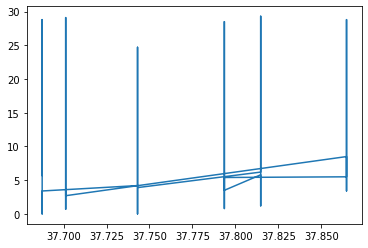

In [ ]:
### SOLUTION ###
plt.plot(data["SITE_LATITUDE"],data['Daily Mean PM2.5 Concentration'])

From the plots above, it's fairly evident which predictor will contribute the most in the *linear* regression model.
<br>

</br>

### 1. Go through the following steps to create a regression model.
As you know, a multiple linear regression model follows the form: $f(x_1, x_2)= \theta_1 x_1 + \theta_2 x_2$, where $x_1$ and $x_2$ are just single values coming from our data.

For larger numbers of features (x's), it is often rewritten in matrix and vector notation:  $\vec y$ = $X\vec\theta$ (where $X$ is our data as a matrix, $\vec\theta$ is a vector of some constants, and $\vec y$ is a vector of our predicted values, one value for each "row" in $X$).

In other words, the first element of $\vec y$, $y_0$, is the *dot product* of the first row of matrix $X$, $X_0$, and $\vec\theta$. The second element of $\vec y$, $y_1$, is the *dot product*  $X_1$,and $\vec\theta$... The $i$th element of $\vec y$, $y_i$, is the *dot product*  $X_i$,and $\vec\theta$.

#### Step One: SELECT A MODEL
Keep track of the dimensions of each vector/matrix you're working with.

In [ ]:
def multiple_linear_reg_model(thetas, xs):
    """
    A Multiple Linear Regression model: the product of xs and thetas
    
    Dimensions of thetas: p x 1
    Dimensions of xs: n x p
    
    """
    ### SOLUTION ###
    return xs@thetas


In [ ]:
### SOLUTION ###
xs = data[["DAILY_AQI_VALUE", "SITE_LATITUDE"]].values
###

theta_1 = .25
theta_2 = .01

### SOLUTION ###
thetas = np.array([theta_1, theta_2])
###

### SOLUTION ###
y = data['Daily Mean PM2.5 Concentration'].values
###


### Step Two: SELECT A LOSS FUNCTION
Let's go with MSE for now.

In [ ]:
import numpy as np

def mse_loss_function(theta, x, y):
    n = len(y)
    theta = np.array(theta)
    return np.mean((y - multiple_linear_reg_model(theta, x))**2)

### Step Three: FIT YOUR MODEL TO LOSS

(The entire derivation can be found in the lecture slides)

Ultimately, we end up with:

$ \vec\theta = (X^TX)^{-1}X^T\vec y $

where theta is a $p x 1$ vector, $X$ is an $n x p$ vector, and $\vec y$ is a $n x 1$ vector.

In code, apply the above expression to our data.

In [ ]:
### SOLUTION ###
from numpy.linalg import inv

X = data[['DAILY_AQI_VALUE', 'SITE_LATITUDE']].values

y = data['Daily Mean PM2.5 Concentration'].values

theta_array = inv(X.T@X)@X.T@y
theta_array

array([ 0.26497362, -0.0150594 ])

### 2. Using scikit-learn, find the vector of the optimal $\theta$ coefficients.
As a sanity check, we can leverage sklearn's linear_model library and see what optimal values of $\theta$ they get.

Use `.coef_` to get the coefficients of your model.

In [ ]:
from sklearn.linear_model import LinearRegression

### SOLUTION ###
X = data[['DAILY_AQI_VALUE', 'SITE_LATITUDE']].values

y = data['Daily Mean PM2.5 Concentration'].values

# 1, 2. Select the model and loss function
mlr_model = LinearRegression(fit_intercept = False)

# 3. Fit the model to loss using your data
mlr_model.fit(X, y)

mlr_model.coef_


array([ 0.26497362, -0.0150594 ])

Cool, they're about the same.

Our final fitted model would be: $f(x) = .265x_1 - .015x_2$

# Congratulations! You reached the end of the notebook :)

## A note for the future: linear regression vs. forecasting

As you know, the crux of this class is the final research project that you will tackle. It will be entirely your own discretion to find your own datasets and construct your own data analysis.

In the past, there have been several questions regarding the difference between regression and forecasting. And in many cases, this debate surfaces from the question "why can't I use regression here?" This goes back to the underlying probabilistic assumptions we make when conducting linear regression. More information can be found in the chapters 23, 24, and 25 of the [prob140 textbook](http://prob140.org/textbook/Chapter_23/00_Multivariate_Normal_RVs.html). Tersely put, regression assumes consecutive samples from some population (or the "rows" of your DataFrame) were drawn independent; forecasting has rows that are dependent of each other (the previous "row" in your DataFrame is used to calculate the next row).